In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

In [3]:
data = np.loadtxt('../data/data.txt')

R = data[:, 0]  # Widerstand in Ohm
delta_t = data[:, 1]  # zeitlicher Abstand in S
U = data[:, 2]  # Spannung in V
I = data[:, 3] / 1000  # Stromstärke in A
M = 63.546  # molare Masse von Kupfer in g/mol
m = 342  # Masse der Probe in g


# Step 3: Perform a linear fit using np.polyfit (degree 1 for linear)
# coefficients = np.polyfit(x, y, 1)  # Returns [slope, intercept]

# # Step 4: Create a linear model with the fitted coefficients
# linear_fit = np.poly1d(coefficients)

# # Step 5: Plot the data and the linear fit
# plt.scatter(x, y, label='Data', color='blue')  # Original data points
# plt.plot(x, linear_fit(x), label='Linear Fit', color='red')  # Fitted line
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()

In [4]:
T = np.round(0.00134 * R**2 + 2.296 * R - 243.02)[1:]
E = (U * I * delta_t)[1:]
C_p = M/m * E/10

B = 137.8e9
V_0 = 7.092e-6 # m^3/mol
alpha = np.array([10.04,10.96,11.70,12.29,12.81,13.29,13.69,14.01,14.33,14.58,14.81,15.03,15.26,15.46,15.64,15.80,15.96,16.15,16.28])*10e-7

C_V = C_p - 9 * (T + 273.15) * V_0 * alpha**2 * B

new_data = np.column_stack((T,E,C_p,C_V))
np.savetxt("../results/new_data.txt", new_data)

TplusAlpha = np.column_stack((T,alpha*10e5))
np.savetxt("../results/TplusAlpha.txt", TplusAlpha)

# # Convert to a DataFrame for better formatting
# df = pd.DataFrame(new_data, columns=["$T$ / °C", "$E$ / J", "$C_p$ / (J/(mol*K))", "$C_V$ / (J/(mol*K))"])

# # Generate LaTeX table
# latex_table = df.to_latex(index=False, 
#                           float_format="%.2f", 
#                           header=["$T$ / °C", "$E$ / J", "$C_p$ / (J/(mol*K))", "$C_V$ / (J/(mol*K))"])

# # Save the LaTeX table to a file
# with open("../results/new_data_table.tex", "w") as file:
#     file.write(latex_table)

# print("LaTeX table has been saved to 'new_data.tex'")

# # Convert to a DataFrame for better formatting
# df = pd.DataFrame(TplusAlpha, columns=["$T$ / °C", "$\\alpha$ / 10e-6 (1/K)"])

# # Generate LaTeX table
# latex_table = df.to_latex(index=False, 
#                           float_format="%.2f", 
#                           header=["$T$ / °C", "$\\alpha$ / 10e-6 (1/K)"])

# # Save the LaTeX table to a file
# with open("../results/TplusAlpha_table.tex", "w") as file:
#     file.write(latex_table)

# print("LaTeX table has been saved to 'TplusAlpha.tex'")

print(T[0])
print(C_V)

-180.0
[15.35731189 17.12613903 16.90933629 17.31761454 17.6282124  18.84424504
 19.48834714 20.92682229 21.09269965 20.34108228 20.26547404 19.74051349
 23.75048481 31.33808267 23.82889341 24.21457917 22.5083343  21.44620974
 19.50830678]


In [5]:
# Debye-Temperature
thetaDurchT = np.array([3.3,2.9,2.9,2.8,2.7,2.4,2.3,1.9,1.9]) # starting at -180 grad, finishing at 100 grad
T_low = T[:9]
theta = thetaDurchT * (T_low + 273.15)


T_Debye = np.column_stack((T_low,thetaDurchT,theta))
np.savetxt("../results/T_Debye.txt", T_Debye)

# # Convert to a DataFrame for better formatting
# df = pd.DataFrame(T_Debye, columns=["$T$ / °C", "$\\theta_D/T$", "$\\theta_D$ / °C"])

# # Generate LaTeX table
# latex_table = df.to_latex(index=False, 
#                           float_format="%.2f", 
#                           header=["$T$ / °C", "$\\theta_D/T$", "$\\theta_D$ / °C"])

# # Save the LaTeX table to a file
# with open("../results/T_Debye_table.tex", "w") as file:
#     file.write(latex_table)

# print("LaTeX table has been saved to 'T_Debye.tex'")


In [6]:
# mean and error of the Debye Temperature
mean = np.mean(theta)
error = np.std(theta, ddof=1)  # ddof=1 for sample standard deviation
sem = error / np.sqrt(len(theta))
print(f"Standard Mean minus Error of the Mean: {mean} - {sem}")

Standard Mean minus Error of the Mean: 330.4183333333333 - 7.106392808591431


In [7]:
# Theoretische debye frequenz
N_A = 6.022e23  # mol^-1
v_l = 4.7/3.6  # m/s
v_t = 2.26/3.6  # m/s

k_D = (6 * np.pi**2 * N_A / V_0 )**1/3
v_m = (1 / 3 * ( 1 / v_l**3 + 2 / v_t**3))**(-1/3)

womega = v_m * k_D / (2 * np.pi)
print(womega**0.5)

433906882082146.1


PLOTS

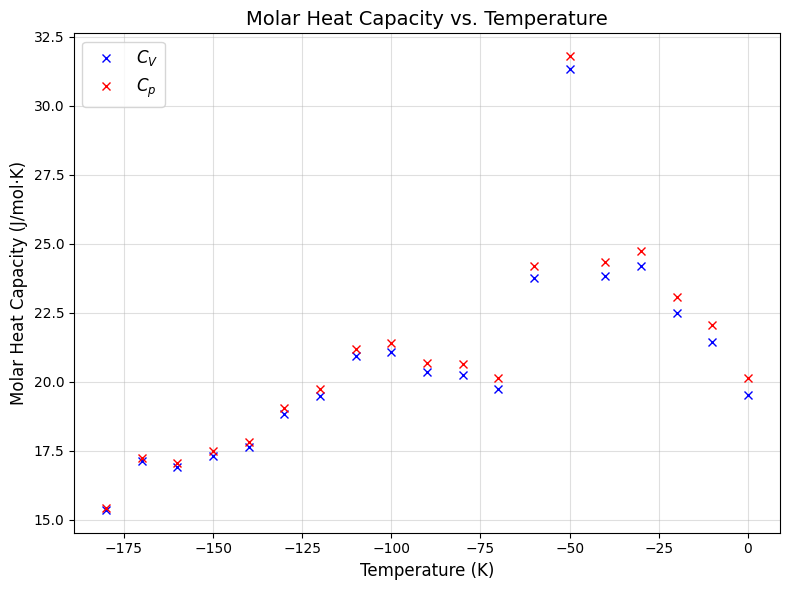

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(T, C_V, "x", label=r'$C_V$', color='blue', linewidth=2)
plt.plot(T, C_p, "x", label=r'$C_p$', color='red', linewidth=2)

plt.title('Molar Heat Capacity vs. Temperature', fontsize=14)

plt.xlabel('Temperature (K)', fontsize=12)

plt.ylabel('Molar Heat Capacity (J/mol·K)', fontsize=12)

plt.grid(alpha=0.4)

plt.legend(fontsize=12, loc='upper left')

plt.tight_layout()

plt.savefig("../figures/CVvsCP.png")
plt.show()